# Campina - Ceilometer
## Script to generate figures for the ATTO weekly report

### Author: Henrique Barbosa
### First version: 17-Jun-2022
### Updates since 6-Feb-2025 by Friederike Lipken 

In [ ]:
# Load all the necessary libraries
import datetime
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
#import netCDF4 as nc
import xarray as xr
import os
import glob

In [2]:
# Define the dates for the report
y0='2025'; m0='03'; d0='31';  # -3 weeks
y1='2025'; m1='04'; d1='14'; # -1 week
y2='2025'; m2='04'; d2='20'; # yesterday

w2 = datetime.date(int(y2), int(m2), int(d2)).isocalendar().week

# title for 3-week plots: YYYY weeks W-2, W-1, W
w02 = y2 + ' weeks ' + str(w2-2) + ', ' + str(w2-1) + ', ' + str(w2)

# title for 1-week plots: YYYY week W
w12 = y2 + ' week ' + str(w2)

# replace spaces/commas with _ to use in filenames save to disk
w02tit = w02.replace(',', '').replace(' ', '_')
w12tit = w12.replace(',', '').replace(' ', '_')

print('This is week: ', w2, ' of year: ', y2)

This is week:  16  of year:  2025


In [ ]:
# define base directory
basedir = '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/'

In [ ]:
# Create a list of all files
# Plots for the report use the last 3 weeks, so some data might be from the previous month. 
allfiles = sorted(glob.glob(basedir + y0 + '/' + m0 + '/' + '*.nc'))
if (int(m0) != int(m2) ):
    allfiles += sorted(glob.glob(basedir + y2 + '/' + m2 + '/' + '*.nc'))
    
# to check if files are correctly loaded
print(allfiles)

['/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/03/20250331_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250401_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250402_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250403_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250404_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250405_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250406_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250407_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250408_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250409_ATTO_CHM160146.nc', '/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Data/2025/04/20250410_ATTO_CHM160146.nc', '/media/f

#### If error occurs, check the files here (otherwise ignore this part)
Because data from (27-28/03/2025) had wrong timesteps

In [ ]:
# open files and check for time values
for file in allfiles:
    ds = xr.open_dataset(file)
    print(f"{file}: {ds['time'].values}")
    ds.close()

In [ ]:
# open files and check for duplicates
all_times = []
for file in allfiles:
    ds = xr.open_dataset(file)
    all_times.extend(ds['time'].values)
    ds.close()

# Convert to np array and check for duplicates
unique_times, counts = np.unique(all_times, return_counts=True)
duplicates = unique_times[counts > 1]

if len(duplicates) > 0:
    print("Duplicate timestamps found:", duplicates)
else:
    print("No duplicate timestamps detected.")

#### End of checking files

In [ ]:
# Now open files with xarray to produce Plots for ATTO report
ds = xr.open_mfdataset(allfiles)

# Create the plots with control/diagnostics

In [ ]:
plt.plot(ds['time'], ds['state_laser'], label='State Laser')
plt.plot(ds['time'], ds['state_detector'], label='State Detector')
plt.plot(ds['time'], ds['state_optics'], label='State Optics')
plt.ylabel('%')
plt.title('State')
plt.legend()
plt.grid('on')
locator=mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Qualitycheck_data/Atto_Ceilometer_State_'+w02tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

In [ ]:
plt.plot(ds['time'], ds['temp_int']-273.15, label='Temp. Internal')
plt.plot(ds['time'], ds['temp_ext']-273.15, label='Temp. External')
plt.plot(ds['time'], ds['temp_det']-273.15, label='Temp. Detector')
plt.plot(ds['time'], ds['temp_lom']-273.15, label='Temp. LOM')
plt.ylabel('deg C')
plt.title('Temperatures')
plt.legend()
plt.grid('on')
locator=mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/Qualitycheck_data/Atto_Ceilometer_Temp_'+w02tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

In [ ]:
plt.plot(ds['time'], ds['p_calc'], label='Calibration pulse')
plt.plot(ds['time'], ds['base'  ], label='Base raw signal')
plt.plot(ds['time'], ds['stddev'], label='Std. dev. raw signal')
plt.ylabel('photons / shot')
plt.title('counts')
plt.legend()
plt.grid('on')
locator=mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))

## Create plots for the report

### (1) cloud base height, 3 weeks

In [ ]:
# variable Cloud Base Height (CBH) is in meters => km
tmp = ds['cbh'].values.astype(float) / 1e3
tmp[tmp < 0] = np.nan

fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [3,1]})
fig.set_figheight(4)
fig.set_figwidth(12)

ax1.plot(ds['time'], tmp,'.')
ax1.set(ylabel='Height above ground [km]')
ax1.grid('on')
ax1.set_ylim([0, 15])
locator=mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)                                   
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))     
ax1.set_title('Cloud Layers, Base height - ' + w02)
#ax1.legend()


ax2.hist(tmp.flatten(), bins=np.linspace(0,12,24), density=True, orientation='horizontal')
ax2.grid('on')
ax2.set_ylim([0, 15])
ax2.set(xlabel='Cloud Base P.D.F.')

#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/ATTO_report/KW16/Atto_Ceilometer_CloudBase_'+w02tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

In [ ]:
tmp = ds['cbh'].values.astype(float) / 1e3
tmp[tmp < 0] = np.nan

fig, (ax1, ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
fig.set_figheight(4)
fig.set_figwidth(12)

ax1.plot(ds['time'], tmp, '.')
ax1.set(ylabel='Height above ground [km]')
ax1.grid('on')
ax1.set_ylim([0, 15])

# Use yyyy-mm-dd-HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))      #added for new date display

# set locator 
#locator = mdates.AutoDateLocator()     
locator = mdates.HourLocator(interval=80)                                      #added for new date display
ax1.xaxis.set_major_locator(locator)                                        #added for new date display

ax1.set_title('Cloud Layers, Base height - ' + w02)

#ax2
ax2.hist(tmp.flatten(), bins=np.linspace(0, 12, 24), density=True, orientation='horizontal')
ax2.grid('on')
ax2.set_ylim([0, 15])
ax2.set(xlabel='Cloud Base P.D.F.')

# Saving the plot
#plt.show()
#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/ATTO_report/KW16/Atto_Ceilometer_CloudBase_' + w02tit + '.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

### (2) cloud base height, 1 week

In [ ]:
tmp = ds['cbh'].values.astype(float) / 1e3
tmp[tmp < 0] = np.nan
time = ds['time']
t1 = np.datetime64(y1+'-'+m1+'-'+d1)

fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [3,1]})
fig.set_figheight(4)
fig.set_figwidth(12)

ax1.plot(time[time>=t1], tmp[time>=t1,:],'.')

ax1.set(ylabel='Height above ground [km]')
ax1.grid('on')
ax1.set_ylim([0, 15])
locator=mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
ax1.set_title('Cloud Layers, Base height - ' + w12)

ax2.hist(tmp[time>=t1,:].flatten(), bins=np.linspace(0,12,24), density=True, orientation='horizontal')
ax2.grid('on')
ax2.set_ylim([0, 15])
ax2.set(xlabel='Cloud Base P.D.F.')

ax1.plot(time[time>=t1], tmp[time>=t1,:],'.')
ax1.set(ylabel='Height above ground [km]')
ax1.grid('on')
ax1.set_ylim([0, 15])
# Use yyyy-mm-dd-HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))      #added for new date display
#locator = mdates.AutoDateLocator()     
locator = mdates.HourLocator(interval=30)  
#locator = mdates.AutoDateLocator()                                          
ax1.xaxis.set_major_locator(locator)  

ax1.set_title('Cloud Layers, Base height - ' + w12)

ax2.hist(tmp[time>=t1,:].flatten(), bins=np.linspace(0,12,24), density=True, orientation='horizontal')
ax2.grid('on')
ax2.set_ylim([0, 15])
ax2.set(xlabel='Cloud Base P.D.F.')

#plt.show()
#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/ATTO_report/KW16/Atto_Ceilometer_CloudBase_'+w12tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

### (3) raw signal (betaraw), 3 weeks

In [12]:
# Apply a 5-min average, and reduce the vertical resolution by a factor of 4 
betaraw = ds['beta_raw'].resample(time='5Min').mean().coarsen(range=4).mean()

# get the new altitudes and times
altitudes = betaraw['range']/1e3
time = betaraw['time']
t1 = np.datetime64(y1+'-'+m1+'-'+d1)

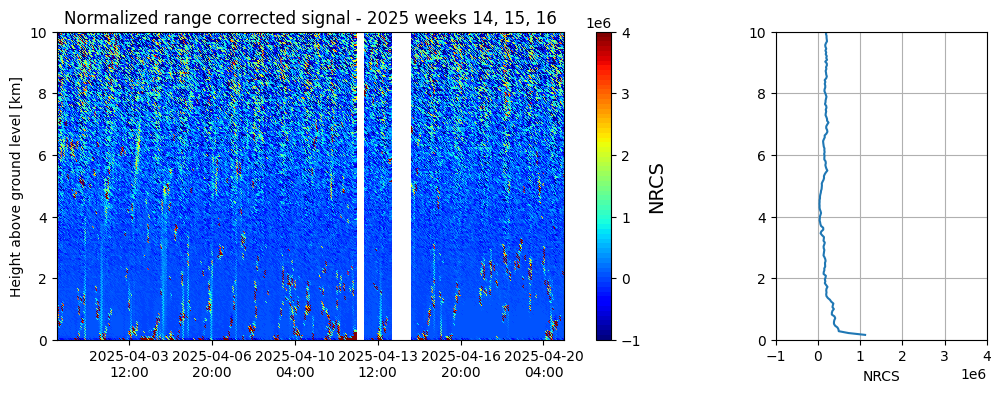

In [ ]:
# This is the plot for 3 weeks
fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [3,1]})
fig.set_figheight(4)
fig.set_figwidth(12)


# in betaraw units
vmin=-1e6
vmax=4e6

# in km
maxalt=10.

betatime = betaraw['time'].values
CS = ax1.pcolormesh(betatime, 
                    betaraw['range']*np.cos(ds.zenith[0]*np.pi/180.)/1e3, 
                    betaraw.T, 
               cmap=plt.get_cmap('jet',64), vmin=vmin, vmax=vmax, 
               shading='nearest', edgecolors='face')
ax1.set(ylabel='Height above ground level [km]')
ax1.set_ylim([0, maxalt])

# Use yyyy-mm-dd-HH:MM format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))      
    
locator = mdates.HourLocator(interval=80)                                       
ax1.xaxis.set_major_locator(locator)  

ax1.set_title('Normalized range corrected signal - ' + w02)

cb = plt.colorbar(CS, ax=ax1)
cb.set_label(label = 'NRCS', fontsize=14)

ax2.plot(np.mean(betaraw[:,2:], axis=0), betaraw['range'][2:]/1e3)
ax2.grid('on')
ax2.set(xlabel='NRCS')
ax2.set_xlim([vmin, vmax])
ax2.set_ylim([0, maxalt])

#plt.show()
#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/ATTO_report/KW16/Atto_Ceilometer_Signal_'+w02tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')

### (4) raw signal (betaraw), 1 week

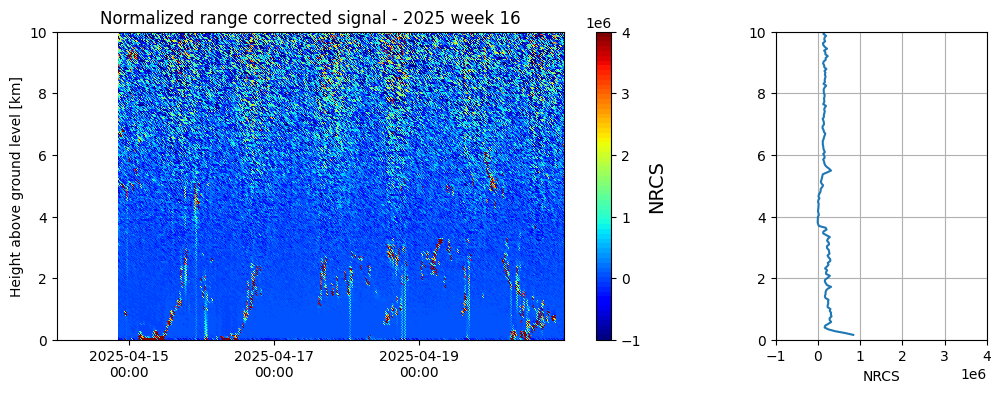

In [ ]:
# the data was already resampled, so we don't have to do it again

fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [3,1]})
fig.set_figheight(4)
fig.set_figwidth(12)

vmin=-1e6
vmax=4e6
maxalt=10.

betatime = betaraw['time'].values
CS = ax1.pcolormesh(betatime[betatime>t1], 
                    betaraw['range']*np.cos(ds.zenith[0]*np.pi/180.)/1e3, 
                    betaraw.T[:,betatime>t1], 
               cmap=plt.get_cmap('jet',64), vmin=vmin, vmax=vmax, 
               shading='nearest', edgecolors='face')
ax1.set(ylabel='Height above ground level [km]')
ax1.set_ylim([0, maxalt])

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))   
        
locator = mdates.AutoDateLocator(minticks=3)                               
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))  

ax1.set_title('Normalized range corrected signal - ' + w12)

cb = plt.colorbar(CS, ax=ax1)
cb.set_label(label = 'NRCS', fontsize=14)

ax2.plot(np.mean(betaraw[betatime>t1,2:], axis=0), betaraw['range'][2:]/1e3)
ax2.grid('on')
ax2.set(xlabel='NRCS')
ax2.set_xlim([vmin, vmax])
ax2.set_ylim([0, maxalt])

#plt.savefig('/media/flipken/Elements/PhD_ATTO/Ceilo_Campina/ATTO_report/KW16/Atto_Ceilometer_Signal_'+w12tit+'.png', dpi=150, format='png', facecolor='white', bbox_inches='tight')